### Realizando a importação da biblioteca pandas, matplotlib, seaborn ###

In [94]:
%pip install --quiet matplotlib seaborn pandas scikit-learn

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Fazendo importação de dados de uma URL como se fosse um arquivo csv e lendo o arquivo csv

In [95]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url)

Lendo o Head (primeiras linhas do csv)

In [96]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


Definindo nome para as colunas do csv

In [97]:
Columns = ['Sepal_lenght','Sepal_width','Petal_lenght','Petal_wifth','Class_labels']

Lendo novamente porem agora com os nomes setados

In [98]:
df = pd.read_csv(url,names=Columns)
df.head()

,Sepal_lenght,Sepal_width,Petal_lenght,Petal_wifth,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Plotando graficos usando o Seaborn

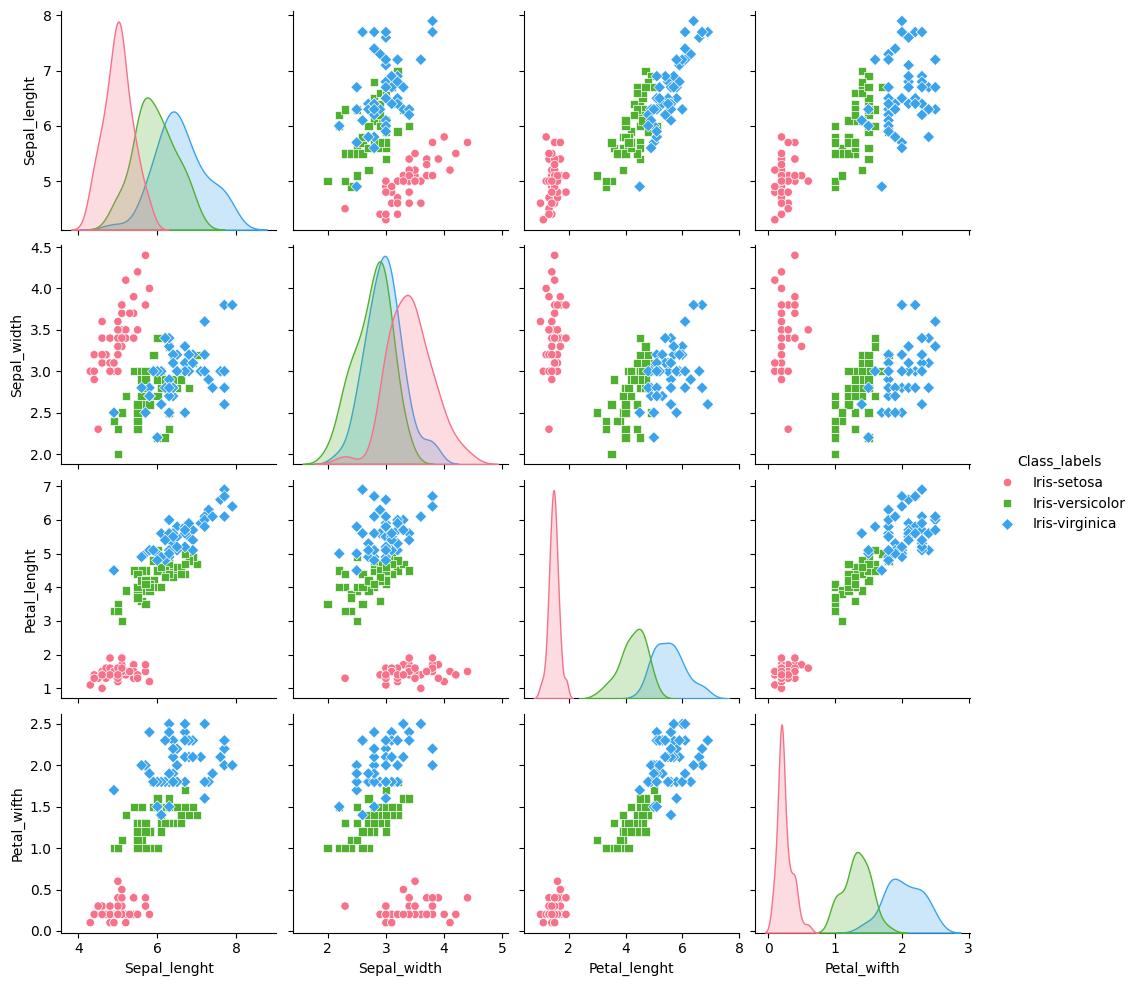

In [99]:
sns.pairplot(df, hue="Class_labels", palette="husl", markers=["o","s","D"])

In [100]:
df.isna().any()

Sepal_lenght    False
Sepal_width     False
Petal_lenght    False
Petal_wifth     False
Class_labels    False
dtype: bool

Carreando bibliotecas do separador do python

In [101]:
#Importanto bibliotecas do sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier




Carregando e separando os dadoos


In [102]:
iris = load_iris() #Carregandos os dados

In [103]:
#Separando os Dados
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


In [104]:
#Importanto bibliotecas do sklearn
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [105]:
k = 3
classifier = KNeighborsClassifier(n_neighbors=k)

In [106]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [107]:
y_pred = classifier.predict(X_test)

In [108]:
cm = confusion_matrix(y_test, y_pred)

In [109]:
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [110]:
acuracia = accuracy_score(y_test,y_pred) * 100

In [111]:
print("A minha acurácia deste modelo é igual a: " + str(round(acuracia, 2)) + '%')


A minha acurácia deste modelo é igual a: 100.0%


In [116]:
#Melhor fator K
K_range = list(range(1,50))
acertos = []

for k in K_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    classes_encontradas = modelo.predict(X_test)
    acertos.append(accuracy_score(y_pred,classes_encontradas))

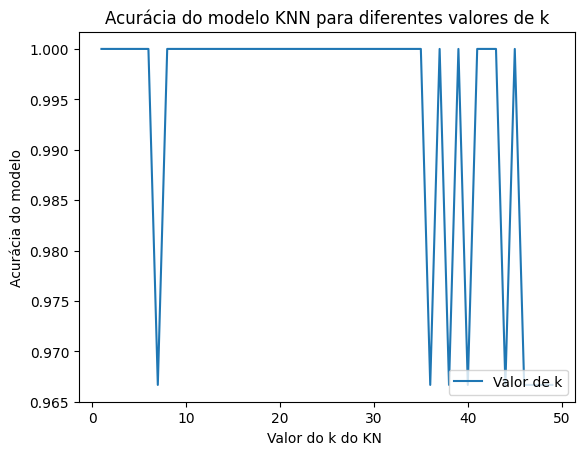

In [121]:
plt.plot(K_range,acertos)
plt.xlabel("Valor do k do KN ")

plt.ylabel("Acurácia do modelo")

plt.title("Acurácia do modelo KNN para diferentes valores de k")
plt.legend(["Valor de k"], loc="lower right")